# 0.Dataset

#### Car Data

https://www.kaggle.com/datasets/goyalshalini93/car-data

# 1. Data Preparation


## 1.1 Problem Statement and Objective


## 1.2 Data Overview and Loading

In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
cars=pd.read_csv('C:/Anaconda3/car_price_prediction/CarPrice_Assignment.csv')

In [17]:
cars.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [11]:
cars.shape

(205, 26)

In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## 1.3 Data Exploration (Charts, Descriptions)


In [43]:
cars[['company_name', 'car_name']] = cars['CarName'].str.split(' ', n=1, expand=True)
cars.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name,car_name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.000,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.000,audi,100ls
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110,5500,19,25,15250.000,audi,fox
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.40,8.5,110,5500,19,25,17710.000,audi,100ls
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,3.19,3.40,8.5,110,5500,19,25,18920.000,audi,5000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.40,8.3,140,5500,17,20,23875.000,audi,4000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,3.13,3.40,7.0,160,5500,16,22,17859.167,audi,5000s (diesel)


In [50]:
cars=cars.drop(['CarName'],axis=1)

In [61]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [67]:
# Getting the unique elements of each categorical col
categorical_cols = cars.select_dtypes(include=['object'])
for col, unique_vals in categorical_cols.items():
    print(f"Unique values in column '{col}':")
    print(unique_vals.unique())
    print('-' * 50)

Unique values in column 'fueltype':
['gas' 'diesel']
--------------------------------------------------
Unique values in column 'aspiration':
['std' 'turbo']
--------------------------------------------------
Unique values in column 'doornumber':
['two' 'four']
--------------------------------------------------
Unique values in column 'carbody':
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
--------------------------------------------------
Unique values in column 'drivewheel':
['rwd' 'fwd' '4wd']
--------------------------------------------------
Unique values in column 'enginelocation':
['front' 'rear']
--------------------------------------------------
Unique values in column 'enginetype':
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
--------------------------------------------------
Unique values in column 'cylindernumber':
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
--------------------------------------------------
Unique values in column 'fuelsystem':
['mpfi

In [81]:
# fixing any problem related to spelling
def fix_misspelling(wrong,right):
    cars['company_name'].replace(wrong,right,inplace=True)


In [83]:
fix_misspelling('maxda','mazda')
fix_misspelling('Nisaan','nissan')
fix_misspelling('porcshe','porsche')
fix_misspelling('vokswagen','volkswagen')
fix_misspelling('toyouta','toyota')
fix_misspelling('vw','volkswagen')

C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_556\2203081216.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['company_name'].replace(wrong,right,inplace=True)


In [85]:
cars['company_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

In [101]:
has_duplicates = cars.duplicated().sum()
has_duplicates

np.int64(0)

#### Target Visulization

C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_556\766289519.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(cars['price'], kde=True, bins=30,palette='viridis')


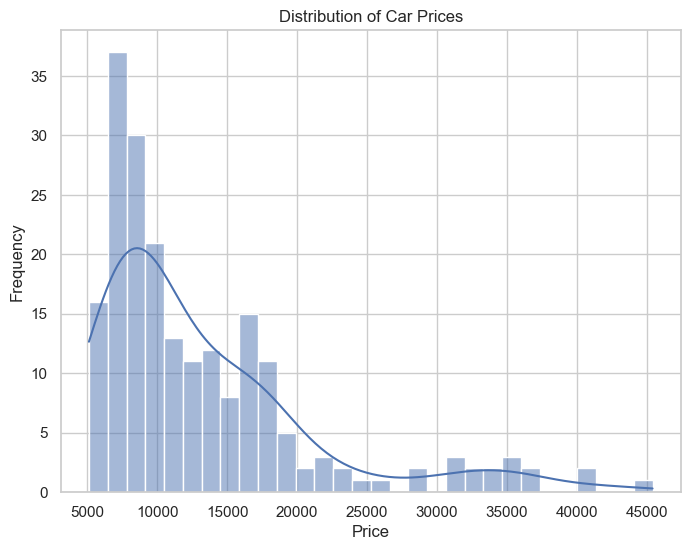

In [168]:
plt.figure(figsize=(8, 6))
sns.histplot(cars['price'], kde=True, bins=30,palette='viridis')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Correlation matrix

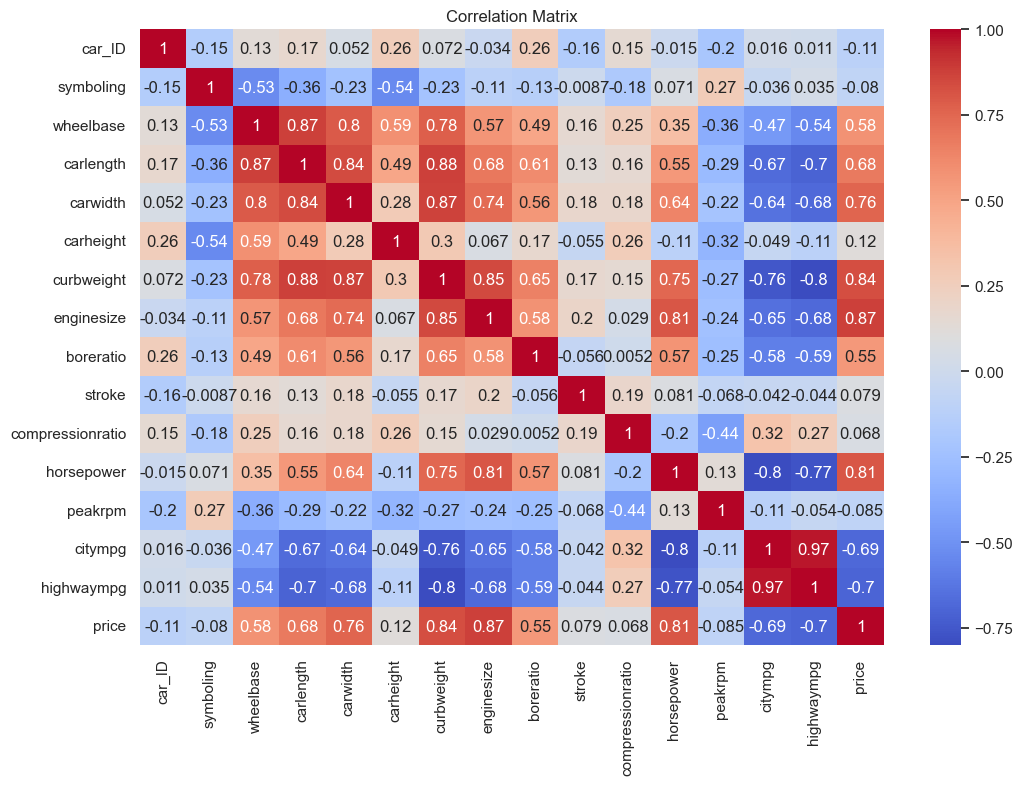

In [170]:
numerical_cols = cars.select_dtypes(include=['int','float'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Notes:
####  Postive strong relation between price and [car_length,car_width,curbweight,engine_size, horesepower]
####  Negative strong relation between price and[cirtmpg,highwaympg]

In [123]:
avg_price_by_company = cars.groupby('company_name')['price'].mean().sort_values(ascending=False)
avg_price_by_company

company_name
jaguar         34600.000000
buick          33647.000000
porcshce       32528.000000
porsche        31118.625000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
nissan         10704.882353
mazda          10652.882353
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Nissan          5499.000000
Name: price, dtype: float64

C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_556\424971263.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_name', y='price', data=avg_price_df, palette='viridis')


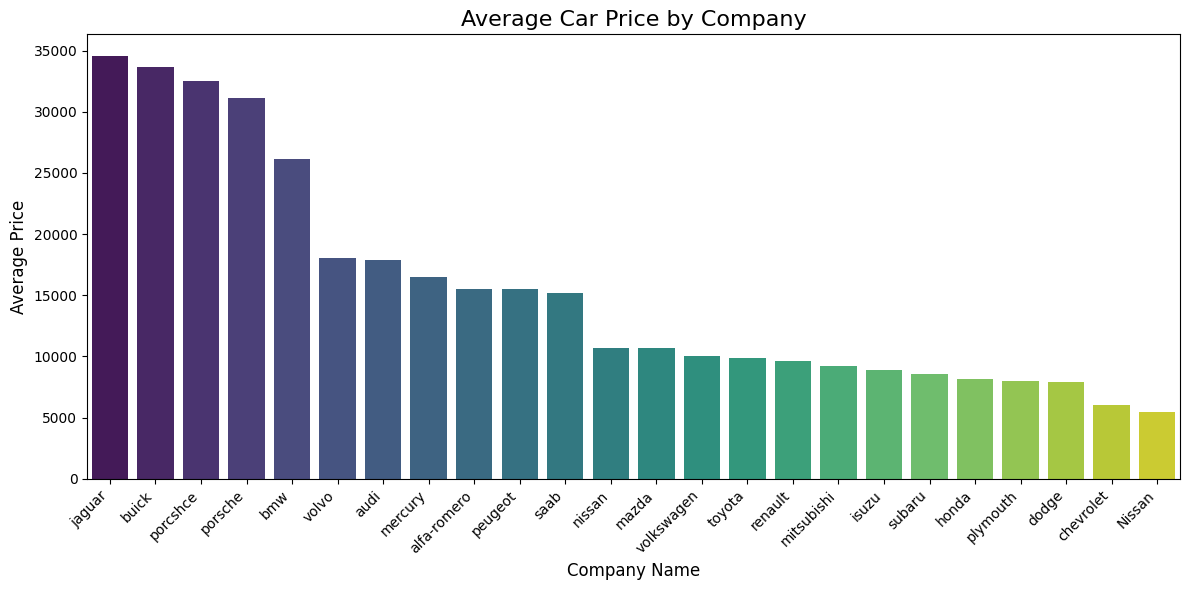

In [125]:
avg_price_df = avg_price_by_company.reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(x='company_name', y='price', data=avg_price_df, palette='viridis')

# Rotate the x labels for better visibility
plt.xticks(rotation=45, ha='right')

# Title and labels
plt.title('Average Car Price by Company', fontsize=16)
plt.xlabel('Company Name', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### Fuel type Vs price 

C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_556\3603274718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fueltype', y='price', data=cars,palette='viridis')


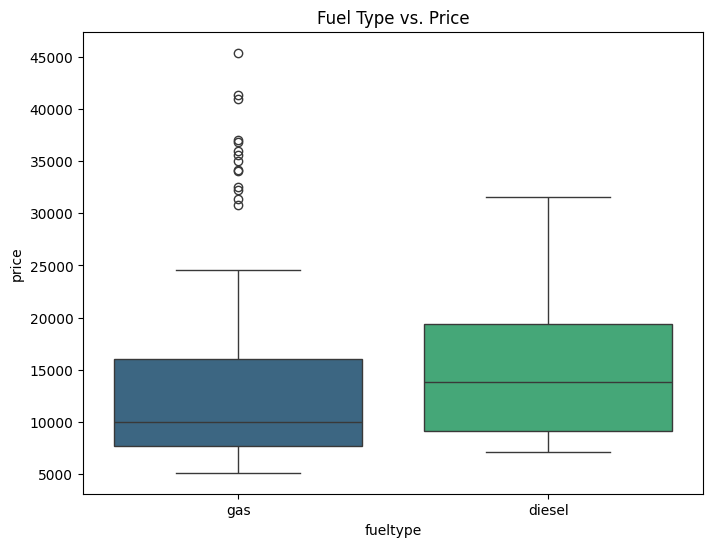

In [130]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fueltype', y='price', data=cars,palette='viridis')
plt.title('Fuel Type vs. Price')
plt.show()

#### Body Type vs. Price

C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_556\1439752989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='carbody', y='price', data=cars,palette='viridis')


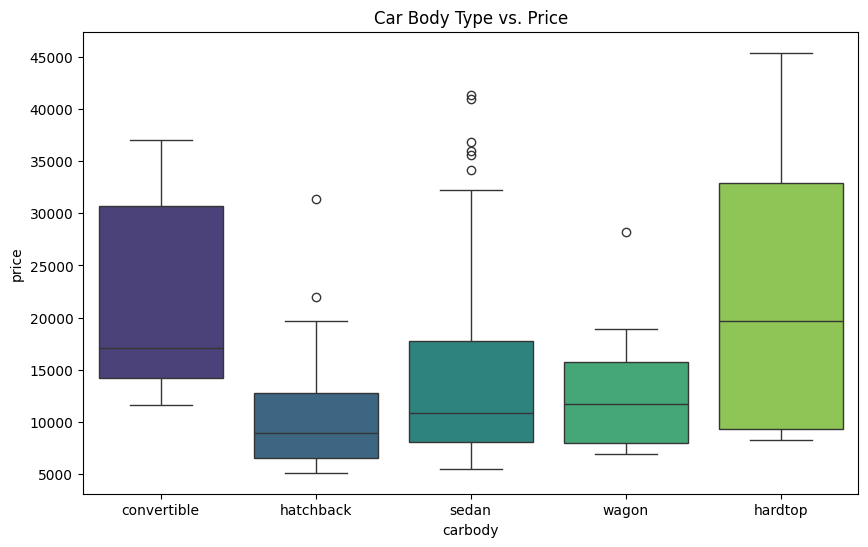

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='carbody', y='price', data=cars,palette='viridis')
plt.title('Car Body Type vs. Price')
plt.show()

#### City Mileage vs. Price

C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_556\678378370.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='citympg', y='price', data=cars,palette='viridis')


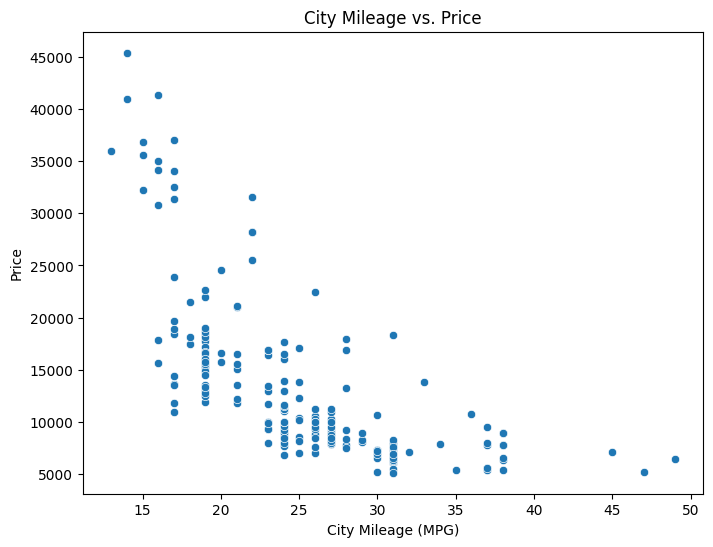

In [153]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='citympg', y='price', data=cars,palette='viridis')
plt.title('City Mileage vs. Price')
plt.xlabel('City Mileage (MPG)')
plt.ylabel('Price')
plt.show()

#### Horsepower vs. Price

C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_556\1147582045.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='horsepower', y='price', data=cars,palette='viridis')


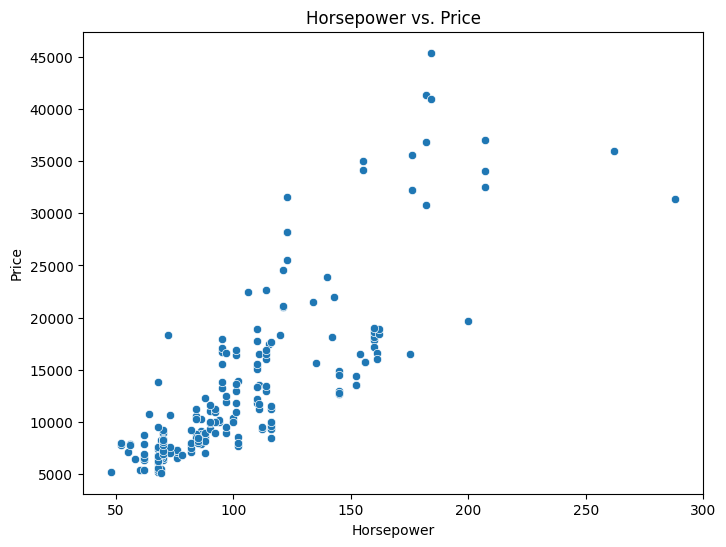

In [138]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='price', data=cars,palette='viridis')
plt.title('Horsepower vs. Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

#### Drive Wheel vs. Price

C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_556\3512064833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='drivewheel', y='price', data=cars,palette='viridis')


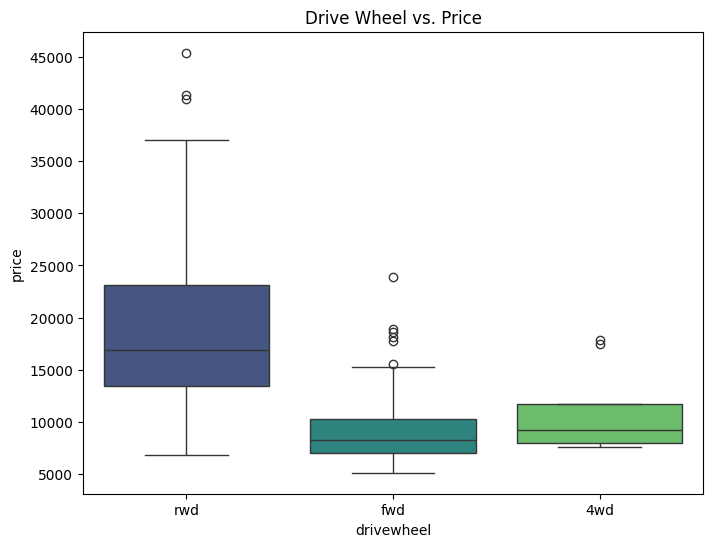

In [143]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='drivewheel', y='price', data=cars,palette='viridis')
plt.title('Drive Wheel vs. Price')
plt.show()

#### Car Length vs. Price



C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_556\2652894697.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='carlength', y='price', data=cars,palette='viridis')


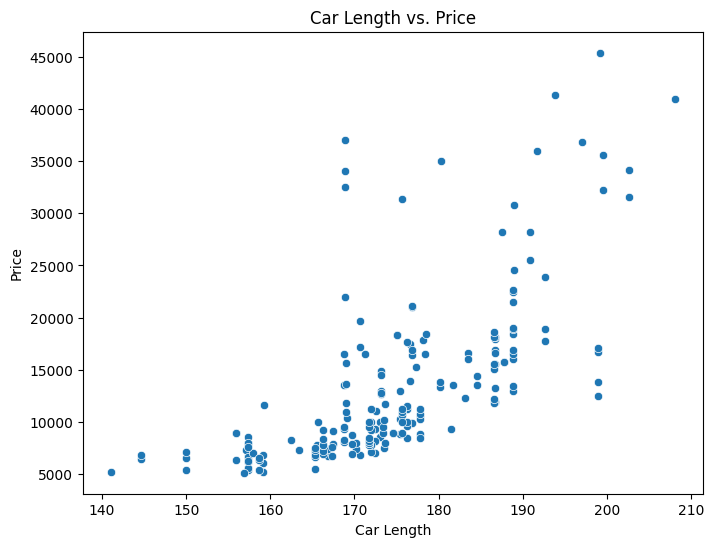

In [145]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carlength', y='price', data=cars,palette='viridis')
plt.title('Car Length vs. Price')
plt.xlabel('Car Length')
plt.ylabel('Price')
plt.show()

### Categorical counts visualiztion

#### Which car body is more common?

C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_556\2575081189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='carbody', data=cars,palette='viridis')


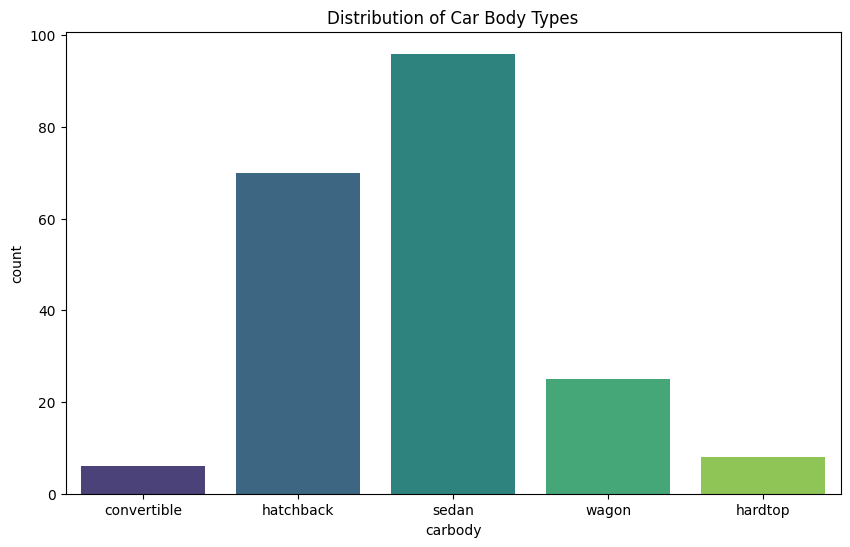

In [158]:
plt.figure(figsize=(10, 6))
sns.countplot(x='carbody', data=cars,palette='viridis')
plt.title('Distribution of Car Body Types')
plt.show()

#### which aspiration type is more common?

C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_556\4248897154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='aspiration', data=cars,palette='viridis')


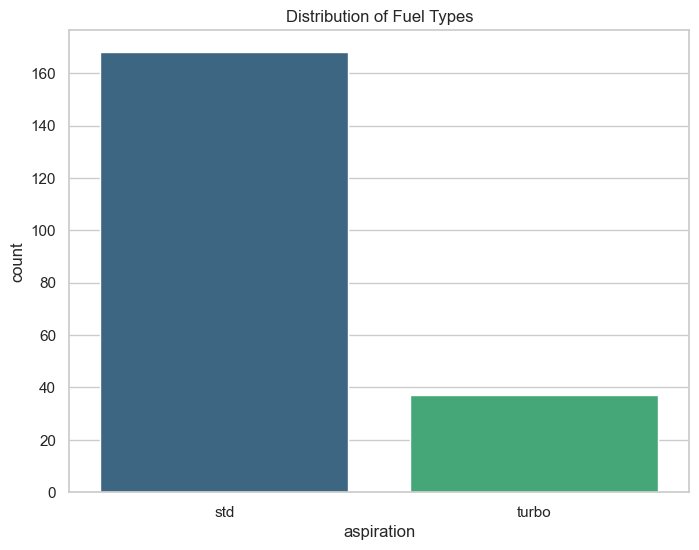

In [175]:
plt.figure(figsize=(8, 6))
sns.countplot(x='aspiration', data=cars,palette='viridis')
plt.title('Distribution of Fuel Types')
plt.show()

#### which fuel type is more common?

C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_556\3679694925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fueltype', data=cars,palette='viridis')


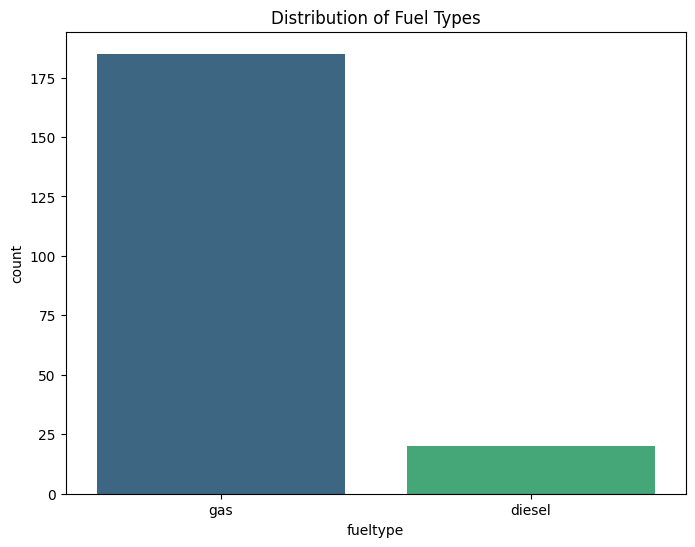

In [162]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fueltype', data=cars,palette='viridis')
plt.title('Distribution of Fuel Types')
plt.show()

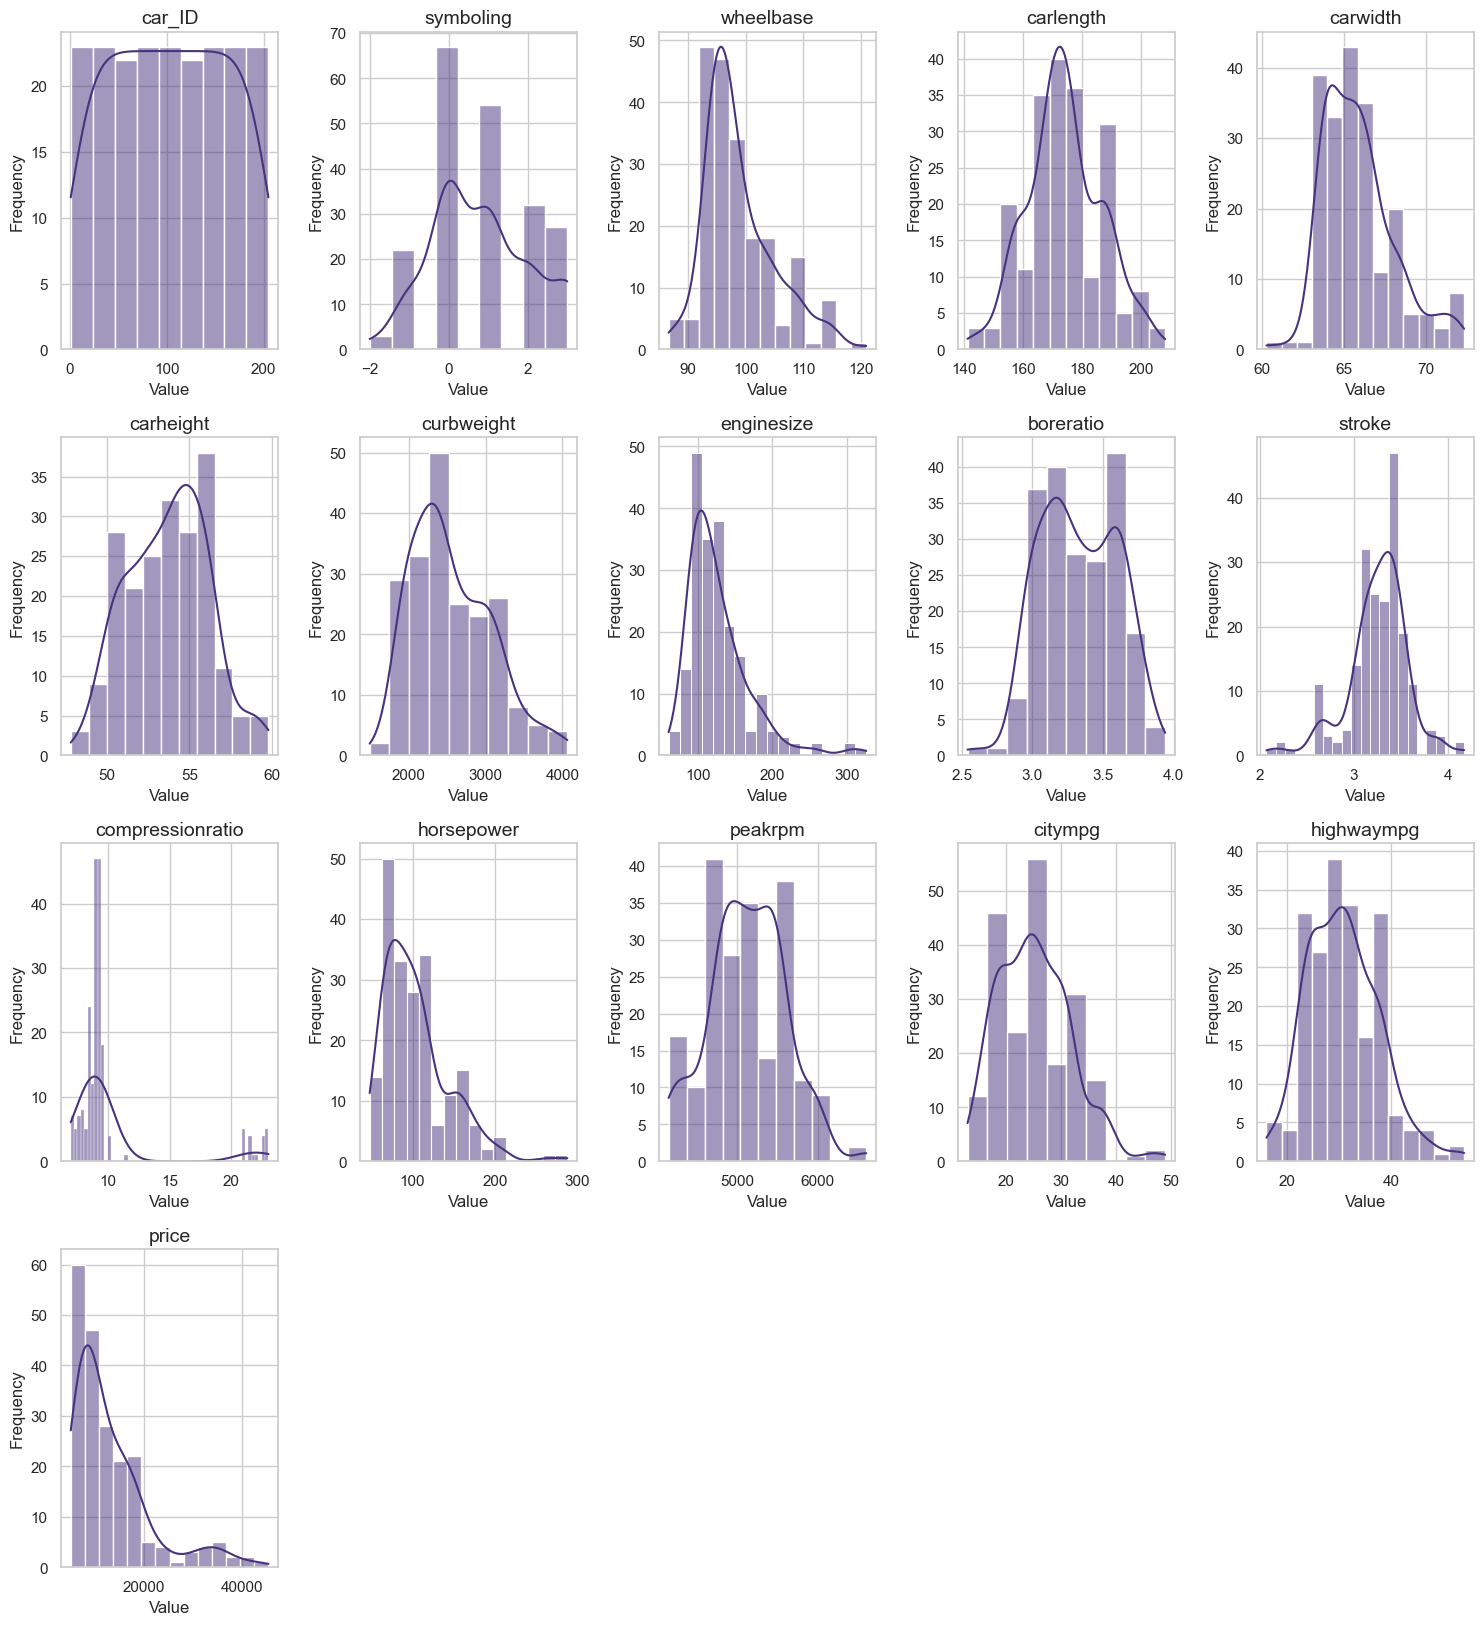

In [166]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 20))  
axes = axes.flatten()  

numerical_columns = cars.select_dtypes(include=['int64', 'float64']).columns

# Plot each histogram
for i, column in enumerate(numerical_columns):
    sns.histplot(cars[column], ax=axes[i], kde=True, color=sns.color_palette('viridis')[0])  # Set the color
    axes[i].set_title(column, fontsize=14)
    axes[i].set_xlabel('Value', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

#### Symboling vs. Price

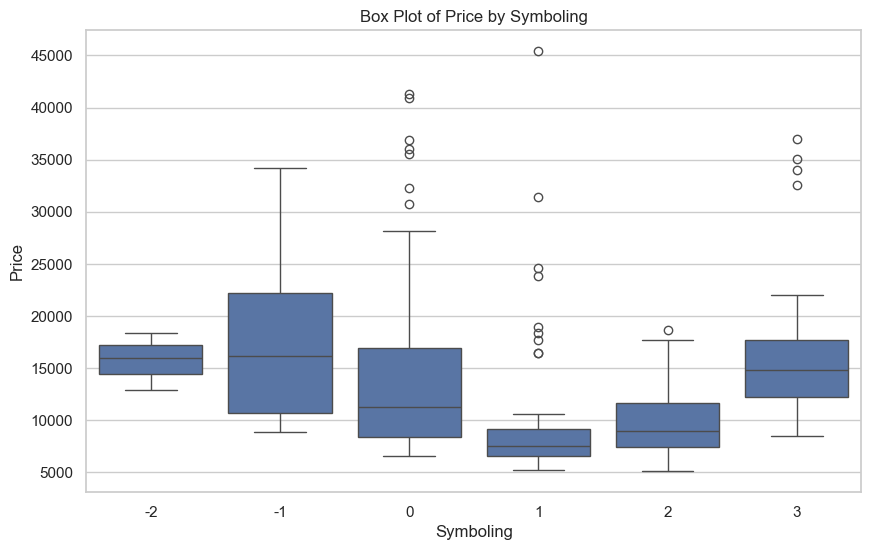

In [192]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='symboling', y='price', data=cars)
plt.title('Box Plot of Price by Symboling')
plt.xlabel('Symboling')
plt.ylabel('Price')
plt.xticks(rotation=0)  # Optional: rotate x-ticks for better visibility
plt.show()

C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_556\2518583632.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_cylinder_category = cars.groupby('cylinder_category')['price'].mean().reset_index()
C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_556\2518583632.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cylinder_category', y='price', data=avg_price_by_cylinder_category, palette='viridis')


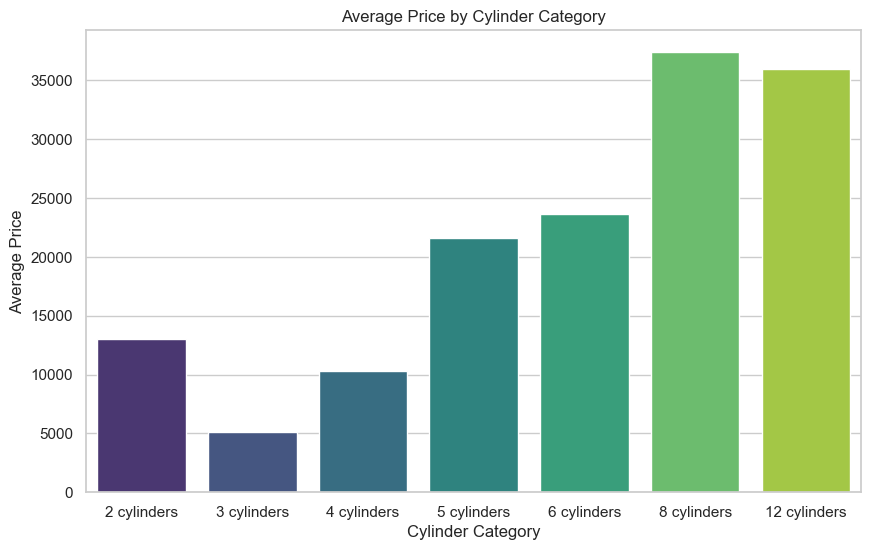

In [217]:
cylinder_mapping = {
    'two': '2 cylinders',
    'three': '3 cylinders',
    'four': '4 cylinders',
    'five': '5 cylinders',
    'six': '6 cylinders',
    'eight': '8 cylinders',
    'twelve': '12 cylinders',
}

# Map cylinder numbers to categories
cars['cylinder_category'] = cars['cylindernumber'].map(cylinder_mapping)

# Calculate average price by cylinder category
avg_price_by_cylinder_category = cars.groupby('cylinder_category')['price'].mean().reset_index()

# Sort the DataFrame by 'cylinder_category' to ensure correct ordering
avg_price_by_cylinder_category['cylinder_category'] = pd.Categorical(avg_price_by_cylinder_category['cylinder_category'],
                                                                    categories=list(cylinder_mapping.values()), 
                                                                    ordered=True)
avg_price_by_cylinder_category = avg_price_by_cylinder_category.sort_values(by='cylinder_category')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='cylinder_category', y='price', data=avg_price_by_cylinder_category, palette='viridis')
plt.title('Average Price by Cylinder Category')
plt.xlabel('Cylinder Category')
plt.ylabel('Average Price')
plt.xticks(rotation=0)  # Optional: rotate x-ticks for better visibility
plt.show()

## 1.4 Data Cleaning and Preparation


In [172]:
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name,car_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [241]:
significant_cols = ['enginetype', 'fueltype', 'carbody', 'aspiration', 'cylindernumber',
                           'drivewheel', 'curbweight', 'carlength', 'carwidth', 'enginesize',
                           'boreratio', 'horsepower', 'wheelbase', 'price']
cars_subset = cars[significant_cols].copy()


In [243]:
cars_subset.head()

,enginetype,fueltype,carbody,aspiration,cylindernumber,drivewheel,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,price
0,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6,13495.0
1,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6,16500.0
2,ohcv,gas,hatchback,std,six,rwd,2823,171.2,65.5,152,2.68,154,94.5,16500.0
3,ohc,gas,sedan,std,four,fwd,2337,176.6,66.2,109,3.19,102,99.8,13950.0
4,ohc,gas,sedan,std,five,4wd,2824,176.6,66.4,136,3.19,115,99.4,17450.0


In [245]:
dummy_columns = ['enginetype', 'fueltype', 'carbody', 'aspiration', 'cylindernumber', 'drivewheel']
df= pd.get_dummies(cars_subset, columns=dummy_columns, drop_first=True)

# Display the new dataframe with dummy variables
df.head()

,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,price,enginetype_dohcv,enginetype_l,...,carbody_wagon,aspiration_turbo,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,2548,168.8,64.1,130,3.47,111,88.6,13495.0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,2548,168.8,64.1,130,3.47,111,88.6,16500.0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,2823,171.2,65.5,152,2.68,154,94.5,16500.0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2337,176.6,66.2,109,3.19,102,99.8,13950.0,False,False,...,False,False,False,True,False,False,False,False,True,False
4,2824,176.6,66.4,136,3.19,115,99.4,17450.0,False,False,...,False,False,True,False,False,False,False,False,False,False


# 2. Modeling

## 2.1 Train-Test Split


In [266]:
X=df.drop('price',axis=1)
y=df['price']

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
scaler=StandardScaler()
num_cols=['curbweight','carlength','carwidth','enginesize','boreratio','horsepower','wheelbase']
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [276]:
X_test.head()

,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,enginetype_dohcv,enginetype_l,enginetype_ohc,...,carbody_wagon,aspiration_turbo,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
15,1.319744,1.234887,0.461713,2.046956,1.112308,1.927399,0.801817,False,False,True,...,False,False,False,False,True,False,False,False,False,True
9,0.972939,0.338150,0.934083,0.113653,-0.709646,1.378842,0.129623,False,False,True,...,False,True,True,False,False,False,False,False,False,False
100,-0.498536,-0.060400,-0.341316,-0.158993,0.034009,-0.192025,-0.256889,False,False,True,...,False,False,False,True,False,False,False,False,True,False
132,0.198994,1.035612,0.272765,-0.134207,0.814846,0.132122,0.062403,False,False,True,...,False,False,False,True,False,False,False,False,True,False
68,2.338608,1.392647,2.067771,1.402522,0.963577,0.456269,1.894133,False,False,True,...,True,True,True,False,False,False,False,False,False,True


## 2.2 Model Training


In [283]:
model=LinearRegression()

In [285]:
model.fit(X_train,y_train)

LinearRegression()

# 3. Evaluation and Results

In [289]:
y_pred=model.predict(X_test)

In [291]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 10209920.152417785
R-squared (R2): 0.8706688608123749


## 3.1 Model Evaluation (Metrics)


## 3.2 Results and Interpretation

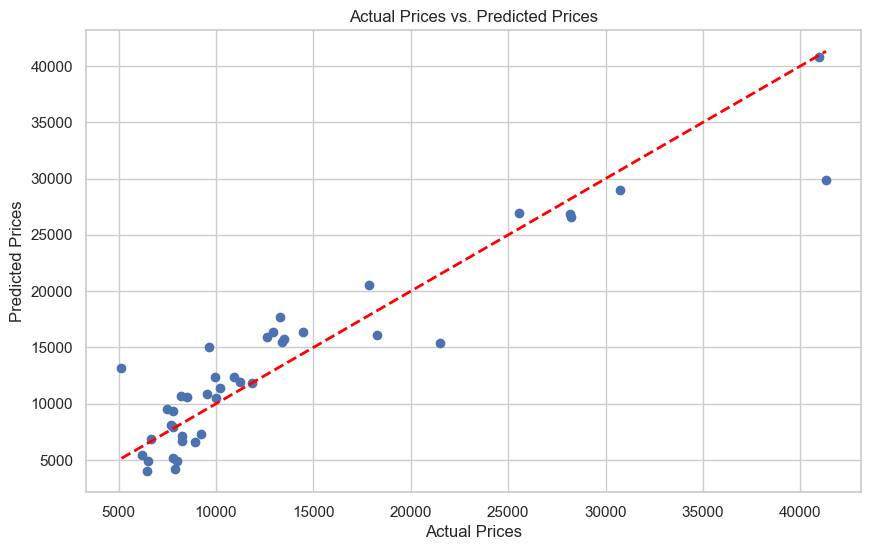

In [303]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for reference
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

## further improvements can be made like using rfe,regularization, feature reselection, hyperparameter tuning